In [ ]:
# Practicing Julia
resources: https://www.analyticsvidhya.com/blog/2017/10/comprehensive-tutorial-learn-data-science-julia-from-scratch/
F

In [26]:
using GGPlots 

ArgumentError: ArgumentError: Package GGPlots not found in current path:
- Run `import Pkg; Pkg.add("GGPlots")` to install the GGPlots package.


In [4]:
# Load Packages
using Pkg, JuliaDB, DataFrames, DataFramesMeta, Query, Plotly, Plots, StatsPlots, GraphRecipes, RecipesBase #, JuliaStats

┌ Info: Recompiling stale cache file C:\Users\marqu\.julia\compiled\v1.0\JuliaDB\4FA8g.ji for JuliaDB [a93385a2-3734-596a-9a66-3cfbb77141e6]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\marqu\.julia\compiled\v1.0\DataFrames\AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\marqu\.julia\compiled\v1.0\DataFramesMeta\2xRTO.ji for DataFramesMeta [1313f7d8-7da2-5740-9ea0-a2ca25f37964]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\marqu\.julia\compiled\v1.0\Query\wGX7b.ji for Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file C:\Users\marqu\.julia\compiled\v1.0\Plotly\M5iCk.ji for Plotly [58dd65bb-95f3-509e-9936-c39a10fdeae7]
└ @ Base loading.jl:1190


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2094576758082026650\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1640931068379486223\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/a26c3e8f243d7a0115ea21069b479cc1093e7c00-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-2094576758082026650\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Info: Recompiling stale cache file C:\Users\marqu\.julia\compiled\v1.0\Plots\ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190


In [5]:
# Load Data
housing = loadtable("C:\\Users\\marqu\\OneDrive\\Documents\\Kaggle\\House Prices Advanced Regression Techniques\\Data\\train.csv")

Table with 1460 rows, 81 columns:
Columns:
#   colname        type
────────────────────────────────────────
1   Id             Int64
2   MSSubClass     Int64
3   MSZoning       String
4   LotFrontage    Union{Missing, Int64}
5   LotArea        Int64
6   Street         String
7   Alley          String
8   LotShape       String
9   LandContour    String
10  Utilities      String
11  LotConfig      String
12  LandSlope      String
13  Neighborhood   String
14  Condition1     String
15  Condition2     String
16  BldgType       String
17  HouseStyle     String
18  OverallQual    Int64
19  OverallCond    Int64
20  YearBuilt      Int64
21  YearRemodAdd   Int64
22  RoofStyle      String
23  RoofMatl       String
24  Exterior1st    String
25  Exterior2nd    String
26  MasVnrType     String
27  MasVnrArea     Union{Missing, Int64}
28  ExterQual      String
29  ExterCond      String
30  Foundation     String
31  BsmtQual       String
32  BsmtCond       String
33  BsmtExposure   String
34  BsmtFin

In [4]:
typeof(housing)

IndexedTable{StructArrays.StructArray{NamedTuple{(:Id, :MSSubClass, :MSZoning, :LotFrontage, :LotArea, :Street, :Alley, :LotShape, :LandContour, :Utilities, :LotConfig, :LandSlope, :Neighborhood, :Condition1, :Condition2, :BldgType, :HouseStyle, :OverallQual, :OverallCond, :YearBuilt, :YearRemodAdd, :RoofStyle, :RoofMatl, :Exterior1st, :Exterior2nd, :MasVnrType, :MasVnrArea, :ExterQual, :ExterCond, :Foundation, :BsmtQual, :BsmtCond, :BsmtExposure, :BsmtFinType1, :BsmtFinSF1, :BsmtFinType2, :BsmtFinSF2, :BsmtUnfSF, :TotalBsmtSF, :Heating, :HeatingQC, :CentralAir, :Electrical, Symbol("1stFlrSF"), Symbol("2ndFlrSF"), :LowQualFinSF, :GrLivArea, :BsmtFullBath, :BsmtHalfBath, :FullBath, :HalfBath, :BedroomAbvGr, :KitchenAbvGr, :KitchenQual, :TotRmsAbvGrd, :Functional, :Fireplaces, :FireplaceQu, :GarageType, :GarageYrBlt, :GarageFinish, :GarageCars, :GarageArea, :GarageQual, :GarageCond, :PavedDrive, :WoodDeckSF, :OpenPorchSF, :EnclosedPorch, Symbol("3SsnPorch"), :ScreenPorch, :PoolArea, :Poo

In [6]:
housing_df = housing |> DataFrame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,Int64,Int64,String,Int64⍰,Int64,String,String,String,String,String,String,String,String,String,String,String,String,Int64,Int64,Int64,Int64,String,String,String,String,String,Int64⍰,String,String,String,String,String,String,String,Int64,String,Int64,Int64,Int64,String,String,String,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,Int64,String,Int64,String,String,Int64⍰,String,Int64,Int64,String,String,String,Int64,Int64,Int64,Int64,Int64,Int64,String,String,String,Int64,Int64,Int64,String,String,Int64
1,1,60,RL,65,8450,Pave,,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NA,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,7,20,RL,75,10084,Pave,,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,,NA,NA,0,8,2007,WD,Normal,307000
8,8,60,RL,missing,10382,Pave,,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,,NA,Shed,350,11,2009,WD,Normal,200000
9,9,50,RM,51,6120,Pave,,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1

In [7]:
showcols(housing_df)

┌ Warning: `showcols(df::AbstractDataFrame, all::Bool=false, values::Bool=true)` is deprecated, use `describe(df, stats=[:eltype, :nmissing, :first, :last])` instead.
│   caller = showcols(::DataFrame) at deprecated.jl:54
└ @ DataFrames .\deprecated.jl:54


,variable,eltype,nmissing,first,last
,Symbol,DataType,Union…,Any,Any
1,Id,Int64,,1,1460
2,MSSubClass,Int64,,60,20
3,MSZoning,String,,RL,RL
4,LotFrontage,Int64,259,65,75
5,LotArea,Int64,,8450,9937
6,Street,String,,Pave,Pave
7,Alley,String,,,NA
8,LotShape,String,,Reg,Reg
9,LandContour,String,,Lvl,Lvl


In [10]:
first(housing_df,5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,Int64,Int64,String,Int64⍰,Int64,String,String,String,String,String,String,String,String,String,String,String,String,Int64,Int64,Int64,Int64,String,String,String,String,String,Int64⍰,String,String,String,String,String,String,String,Int64,String,Int64,Int64,Int64,String,String,String,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,Int64,String,Int64,String,String,Int64⍰,String,Int64,Int64,String,String,String,Int64,Int64,Int64,Int64,Int64,Int64,String,String,String,Int64,Int64,Int64,String,String,Int64
1,1,60,RL,65,8450,Pave,,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,,NA,NA,0,12,2008,WD,Normal,250000


In [8]:
last(housing_df,5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,Int64,Int64,String,Int64⍰,Int64,String,String,String,String,String,String,String,String,String,String,String,String,Int64,Int64,Int64,Int64,String,String,String,String,String,Int64⍰,String,String,String,String,String,String,String,Int64,String,Int64,Int64,Int64,String,String,String,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,Int64,String,Int64,String,String,Int64⍰,String,Int64,Int64,String,String,String,Int64,Int64,Int64,Int64,Int64,Int64,String,String,String,Int64,Int64,Int64,String,String,Int64
1,1456,60,RL,62,7917,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,175000
2,1457,20,RL,85,13175,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NA,MnPrv,NA,0,2,2010,WD,Normal,210000
3,1458,70,RL,66,9042,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NA,GdPrv,Shed,2500,5,2010,WD,Normal,266500
4,1459,20,RL,68,9717,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NA,Attchd,1950,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,142125
5,1460,20,RL,75,9937,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NA,Attchd,1965,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NA,NA,NA,0,6,2008,WD,Normal,147500


In [15]:
describe(housing_df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Union…,DataType
1,Id,730.5,1,730.5,1460,,,Int64
2,MSSubClass,56.8973,20,50.0,190,,,Int64
3,MSZoning,,C (all),,RM,5,,String
4,LotFrontage,70.05,21,69.0,313,,259,Int64
5,LotArea,10516.8,1300,9478.5,215245,,,Int64
6,Street,,Grvl,,Pave,2,,String
7,Alley,,,,Pave,4,,String
8,LotShape,,IR1,,Reg,4,,String
9,LandContour,,Bnk,,Lvl,4,,String


In [16]:
levels(housing_df.Exterior1st)

15-element Array{String,1}:
 "AsbShng"
 "AsphShn"
 "BrkComm"
 "BrkFace"
 "CBlock" 
 "CemntBd"
 "HdBoard"
 "ImStucc"
 "MetalSd"
 "Plywood"
 "Stone"  
 "Stucco" 
 "VinylSd"
 "Wd Sdng"
 "WdShing"

In [14]:
# How many neighborhoods are there in the dataset
countmap(housing_df[:Neighborhood])

UndefVarError: UndefVarError: countmap not defined

In [19]:
x = @from i in housing_df begin
    @where i.SalePrice> 500000
    @select {i.Id, i.HouseStyle}
    @collect DataFrame
end

,Id,HouseStyle
,Int64,String
1,179,1Story
2,441,1Story
3,692,2Story
4,770,2Story
5,804,2Story
6,899,1Story
7,1047,2Story
8,1170,2Story
9,1183,2Story


LoadError: syntax: "\" is not a unary operator

# Graphing

In [8]:
gr()

Plots.GRBackend()

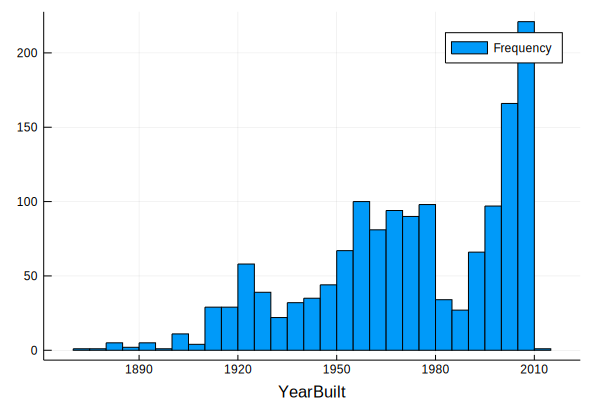

In [9]:
Plots.histogram((housing_df[:YearBuilt]),bins=50,xlabel="YearBuilt",labels="Frequency")

In [10]:
plotly()

Plots.PlotlyBackend()

In [11]:
Plots.histogram((housing_df[:YearBuilt]),bins=50,xlabel="YearBuilt",labels="Frequency")

In [23]:
Plots.plot(housing_df[:GrLivArea],housing_df[:SalePrice],seriestype=:scatter,title="My Scatter Plot")

In [24]:
Plots.scatter(housing_df[:GrLivArea],housing_df[:SalePrice], title = "My Scatter Plot")

In [2]:
[1 2; 3 4][:]

4-element Array{Int64,1}:
 1
 3
 2
 4